# Statistical Programming Python

## Final Group Project - Risk Based Assesment Analysis
## Group - H

Authors:  Luna Allani,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Borja Alonso Lluch,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Fransisco Cortez,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Giorgio Kassouf,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Abhishek Kohli,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Oxana Pangina,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Daniel Victoria López,<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;Santiago Zapata Sánchez

Last revision: 10-March-2021

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import statsmodels.api as sm
import sklearn
import seaborn as sns

### Importing the database: RBA_KYC_Accounts_ALL_Ids.xlsx

In [2]:
df = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx')

## Exploratory Data Analysis

In [3]:
#Checking the number of rows and columns in the dataset
df.shape

(224868, 47)

In [4]:
#Listing the column names of the columns in the dataset
df.columns

Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality', 'dateOfBirth', 'age_in_year',
       'birthCountry', 'birthPlace', 'profession', 'companyType', 'giinCode',
       'lastUpdate', 'status', 'ledgerCode', 'accountCurrency', 'jointAccount',
       'IsBlackListed', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP', 'GENDER',
       'LEGAL_STA_CODE', 'legal_Stat_desc', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'date_of_assessment', 'rbaGradeAbrv', 'rba_grade_desc', 'score_card',
       'score_card_Desc', 'rbaValue'],
      dtype='object')

In [5]:
#Checking Datatypes
df.dtypes

org_code                        int64
branchCode                      int64
customerId                      int64
fullaccount                    object
customerType                    int64
creationDate                   object
onboarding                     object
residentStatus                  int64
residentCountry                object
nationalityOriginal            object
extraNationality               object
dateOfBirth                    object
age_in_year                   float64
birthCountry                  float64
birthPlace                     object
profession                    float64
companyType                   float64
giinCode                       object
lastUpdate                    float64
status                         object
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
IsBlackListed                   int64
CUS_CLASS                       int64
ECO_SEC                         int64
TYPE_OF_DEP 

In [6]:
#Checking the first 5 rows of the dataset to get an essence of the type of data
df.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,...,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,...,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,...,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,...,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,...,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,...,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


In [7]:
#Checking quick stats of the different columns in the dataset
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


### Checking for percentage (%) of missing values

In [8]:
100*df.isnull().sum()/df.isnull().count()

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

## Analyzing missing values

The total number of cells with data are: 8807545
The total number of cells with missing values are: 1761251


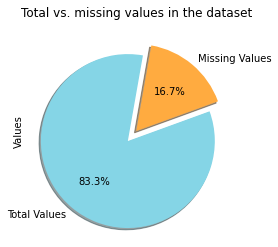

In [9]:
"""
Using a pie chart we try to vizualise the magnitude of missing values by comparing the total number of nulls
to the of cells in the dataset
"""
total_no_nulls = df.count().sum()
print("The total number of cells with data are:", total_no_nulls) # Finding total values
total_nulls = df.isnull().sum().sum() # Finding total missing values
print("The total number of cells with missing values are:" ,total_nulls)

pie1 = pd.DataFrame({'label': ['Missing Values', 'Total Values'],
                   'Values': [1761251, 8807545]})
pie1.set_index('label', inplace=True)
plotpie = pie1.plot.pie(y='Values', title="Total vs. missing values in the dataset", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.15),  colors = ['#ffab40', '#85d5e6'], \
                   shadow=True, startangle=20)

### Making some Histograms

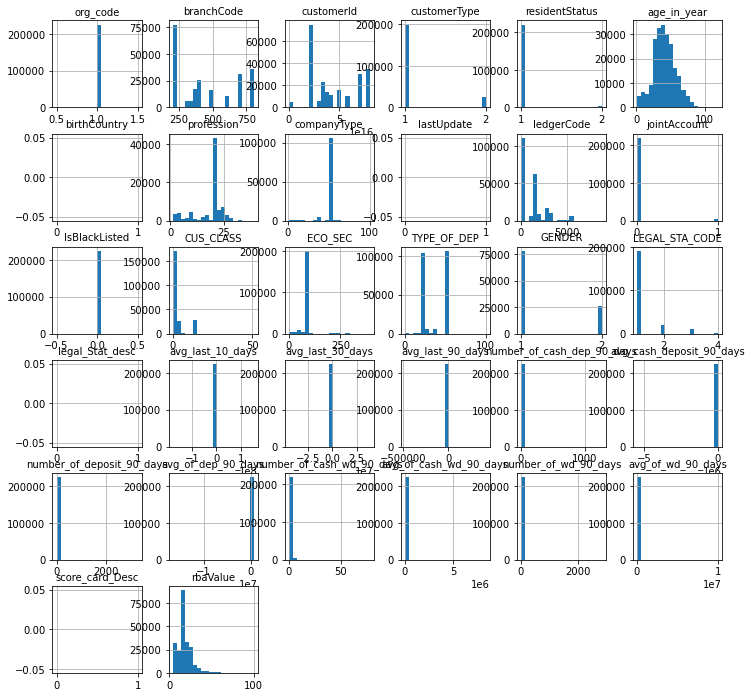

In [10]:
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

### Dropping Empty columns

Empty Columns: **birthCountry,lastUpdate,legal_Stat_desc,score_card_Desc**

In [11]:
print("No of distinct values in column giinCode :"+str(df['giinCode'].value_counts().count()))
print("No of distinct values in column extraNationality :"+str(df['extraNationality'].value_counts().count()))

No of distinct values in column giinCode :1
No of distinct values in column extraNationality :35


Since column **giinCode** with 99.94% nulls, has only 1 unique value we drop the column <br>
We do not drop the column **extraNationality** with 99.20% nulls, because it has substantion number of distinct values and the feature could help in analysis for customers with multiple citizenships<br>

In [12]:
df.drop(['birthCountry',
         'lastUpdate',
         'legal_Stat_desc',
         'score_card_Desc',
         'giinCode'], 
        axis = 1, inplace = True)

# We maintain a list of columns we drop during the Cleaning process to be able to categorize the columns
dropped_cols = ['birthCountry','lastUpdate','legal_Stat_desc','score_card_Desc','giinCode']

#### Dropping colums with only 1 unique value
Since columns with only 1 redundant value is of no use to profile the customer

In [13]:
cols_to_remove = []
for col in df.columns:
    if len(df[col].unique())==1:
        cols_to_remove.append(col)
        print(col)
df.drop(cols_to_remove, axis = 1, inplace = True)
dropped_cols.extend(cols_to_remove)

org_code
status
IsBlackListed
date_of_assessment


## Correlation analysis

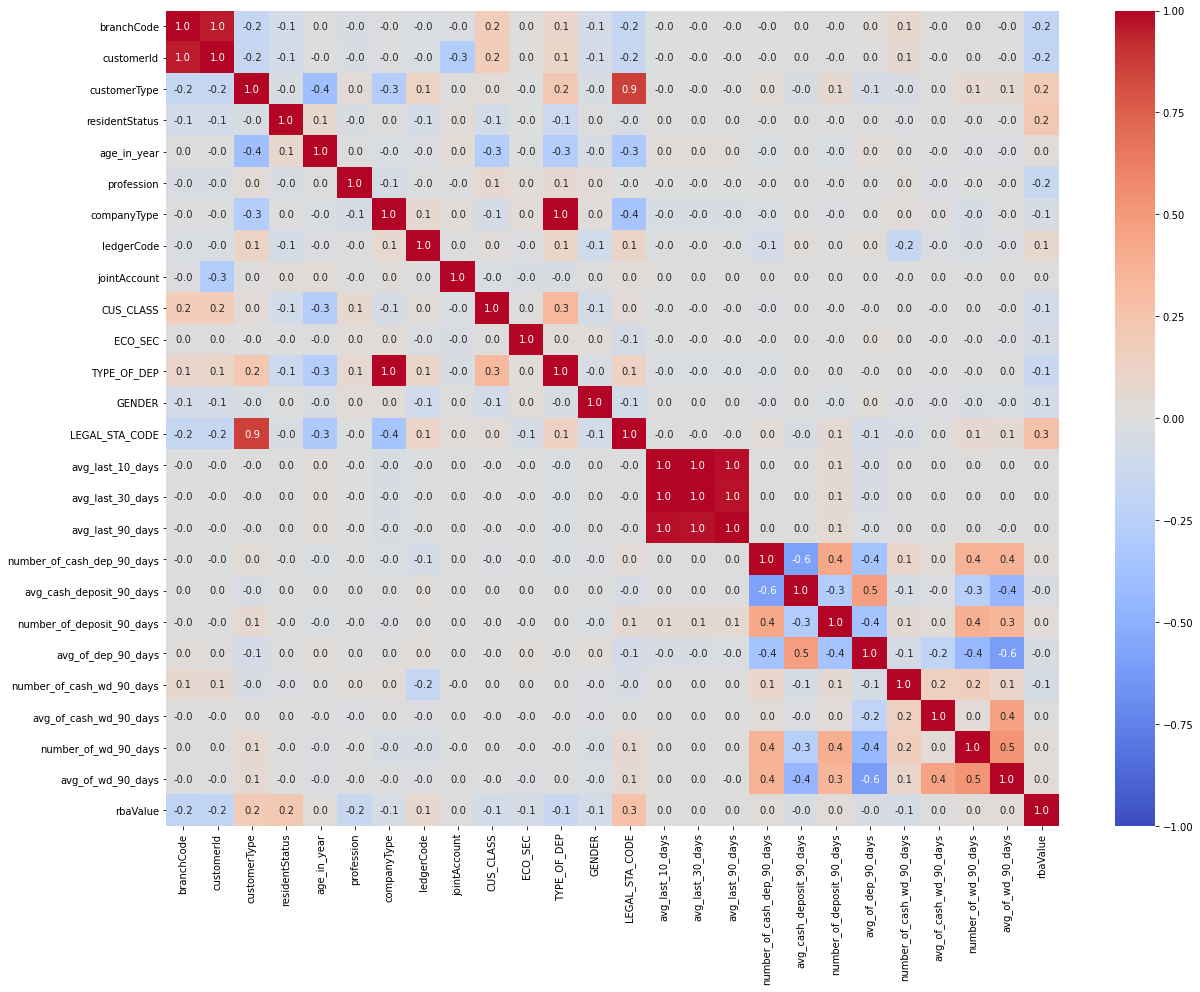

In [14]:
df.corr(method = 'pearson').style.background_gradient(cmap='coolwarm')

import seaborn as sn
import matplotlib.pyplot as plt


corrMatrix = df.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True, cmap = 'coolwarm',vmin=-1, vmax=1, center= 0, fmt='0.1f')
plt.show()

## rbaValue distribution

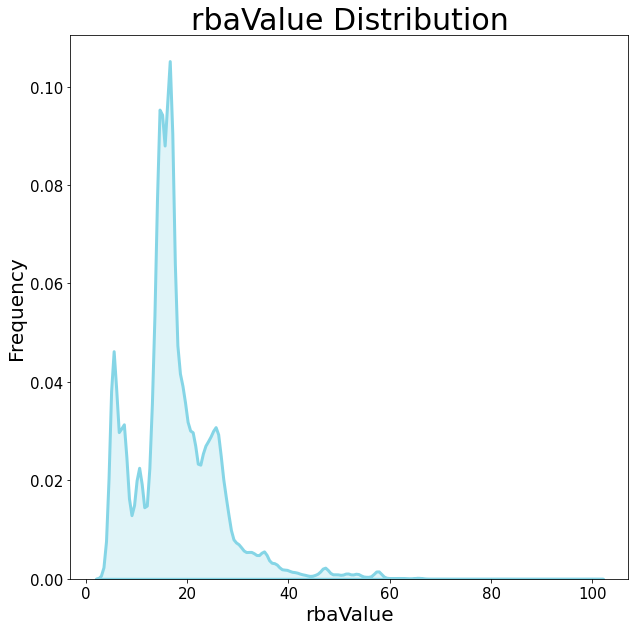

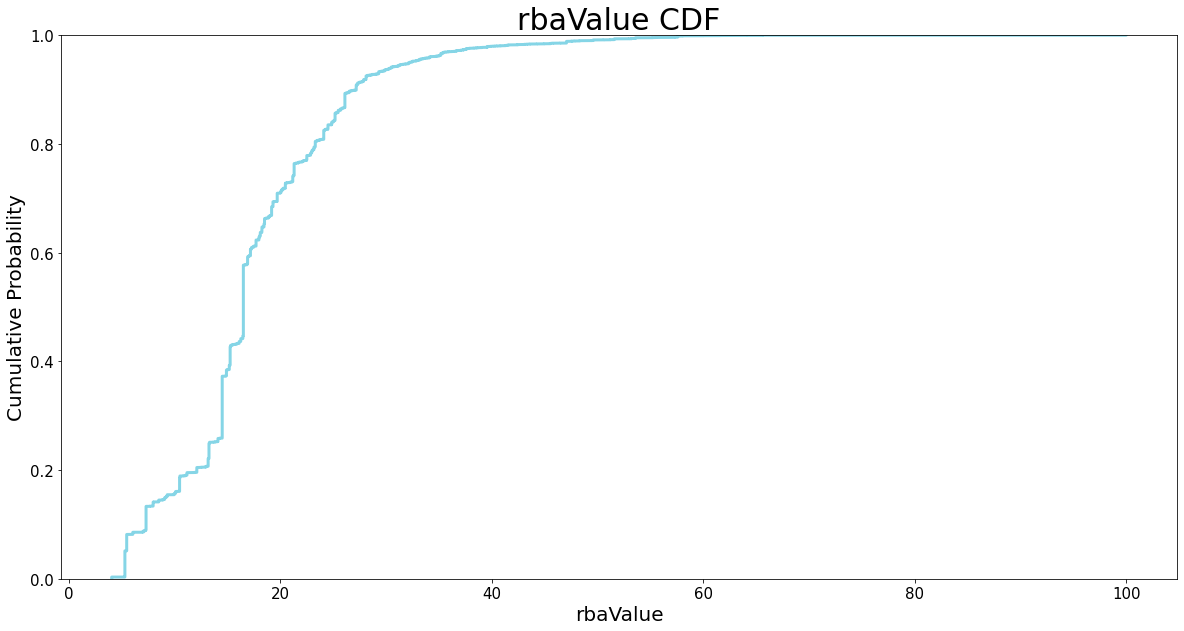

In [15]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
a = sn.kdeplot(data = df, x="rbaValue", color = '#85d5e6',ax=ax,fill=1,linewidth = 3)
a.axes.set_title("rbaValue Distribution",fontsize=30)
a.set_xlabel("rbaValue",fontsize=20)
a.set_ylabel("Frequency",fontsize=20)
a.tick_params(labelsize=15)

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
b = sn.ecdfplot(df, x="rbaValue", color = '#85d5e6', ax=ax,linewidth = 3) #ECDF distribution
b.axes.set_title("rbaValue CDF",fontsize=30)
b.set_xlabel("rbaValue",fontsize=20)
b.set_ylabel("Cumulative Probability",fontsize=20)
b.tick_params(labelsize=15)

## Importing and Creating Metadata DataFrame

Using the metadata sheet provided (RBA Metadata.xlsx) to explain the column values in the dataset we created a dataframe named metadata.<br>
The sheet Country values provided has been used for multiple columns having country values encoded in them namely: residentCountry, extraNationality and nationalityOriginal.<br>
The metadata values provided for columns with lesser values from sheet RBA Metadata Template.MHK.060319-Update.xlsx has been added manually to the dataframe.<br>
The dataframe created contains these columns:
- Code: The risk level or Value for non-risk factors,<br> 
- Value: The encoded value of a long string for an information about the customer,
- Description: The description of the encoded value, 
- col_name: Column name of the column which the metadata describes

In [16]:
metadata_profession = pd.read_excel('RBA Metadata.xlsx',sheet_name='Profession')
metadata_profession.loc[metadata_profession['Code'].str.contains("High"),"Code"] = "High"
metadata_profession.loc[metadata_profession['Code'].str.contains("Med"),"Code"] = "Medium"
metadata_profession.loc[metadata_profession['Code'].str.contains("Low"),"Code"] = "Low"
metadata_profession['col_name'] = "profession"

metadata_company_type = pd.read_excel('RBA Metadata.xlsx',sheet_name='Company Type')
metadata_company_type['col_name'] = "companyType"
metadata_company_type.columns = ['Code','Value','Description','col_name']

metadata_ledgers = pd.read_excel('RBA Metadata.xlsx',sheet_name='Ledgers')
metadata_ledgers['col_name'] = "ledgerCode"
metadata_ledgers.columns = ['Code','Value','Description','col_name']
metadata_ledgers.loc[metadata_ledgers['Code'].str.contains("High"),"Code"] = "High"
metadata_ledgers.loc[metadata_ledgers['Code'].str.contains("Med"),"Code"] = "Medium"
metadata_ledgers.loc[metadata_ledgers['Code'].str.contains("Low"),"Code"] = "Low"

metadata_cus_class = pd.read_excel('RBA Metadata.xlsx',sheet_name='Cus_Class')
metadata_cus_class['col_name'] = "CUS_CLASS"
metadata_cus_class.columns = ['Code','Value','Description','col_name']

metadata_eco_sec = pd.read_excel('RBA Metadata.xlsx',sheet_name='ECO_SEC')
metadata_eco_sec['col_name'] = "ECO_SEC"
metadata_eco_sec.columns = ['Code','Value','Description','col_name']
metadata_eco_sec.loc[metadata_eco_sec['Code'].str.contains("High"),"Code"] = "High"
metadata_eco_sec.loc[metadata_eco_sec['Code'].str.contains("Med"),"Code"] = "Medium"
metadata_eco_sec.loc[metadata_eco_sec['Code'].str.contains("Low"),"Code"] = "Low"

metadata_type_of_dep = pd.read_excel('RBA Metadata.xlsx',sheet_name='Type_Of_DEP')
metadata_type_of_dep['col_name'] = "TYPE_OF_DEP"
metadata_type_of_dep.columns = ['Code','Value','Description','col_name']
metadata_type_of_dep.loc[metadata_type_of_dep['Code'].str.contains("High"),"Code"] = "High"
metadata_type_of_dep.loc[metadata_type_of_dep['Code'].str.contains("Med"),"Code"] = "Medium"
metadata_type_of_dep.loc[metadata_type_of_dep['Code'].str.contains("Low"),"Code"] = "Low"

metadata_Legal_STA_Code = pd.read_excel('RBA Metadata.xlsx',sheet_name='Legal_STA_Code')
metadata_Legal_STA_Code['col_name'] = "LEGAL_STA_CODE"
metadata_Legal_STA_Code.columns = ['Code','Value','Description','col_name']
sta_code_high_pattern = ['_H_','_PHigh_']
metadata_Legal_STA_Code.loc[metadata_Legal_STA_Code['Code'].str.contains('|'.join(sta_code_high_pattern)),"Code"] = "High"
metadata_Legal_STA_Code.loc[metadata_Legal_STA_Code['Code'].str.contains("_M_"),"Code"] = "Medium"
metadata_Legal_STA_Code.loc[metadata_Legal_STA_Code['Code'].str.contains("_L_"),"Code"] = "Low"

metadata_Countries = pd.read_excel('RBA Metadata.xlsx',sheet_name='COUNTRIES')
metadata_Countries['col_name'] = "residentCountry"
metadata_Countries.columns = ['Code','Value','Description','col_name']
metadata_Countries.loc[metadata_Countries['Description'].str.contains("NAMIBIA"),"Value"] = "NA"
metadata_Countries.loc[metadata_Countries['Code'].str.contains("High"),"Code"] = "High"
metadata_Countries.loc[metadata_Countries['Code'].str.contains("Med"),"Code"] = "Medium"
metadata_Countries.loc[metadata_Countries['Code'].str.contains("Low"),"Code"] = "Low"

metadata_ExtraCountry = metadata_Countries.copy()
metadata_ExtraCountry['col_name'] = "extraNationality"
metadata_ExtraCountry.columns = ['Code','Value','Description','col_name']

metadata_nationalityOriginal = metadata_Countries.copy()
metadata_nationalityOriginal['col_name'] = "nationalityOriginal"
metadata_nationalityOriginal.columns = ['Code','Value','Description','col_name']

metadata_Currencies = pd.read_excel('RBA Metadata.xlsx',sheet_name='Currencies')
metadata_Currencies['col_name'] = "accountCurrency"
metadata_Currencies.columns = ['Code','Value','Description','col_name']
metadata_Currencies.loc[metadata_Currencies['Code'].str.contains("High"),"Code"] = "High"
metadata_Currencies.loc[metadata_Currencies['Code'].str.contains("Med"),"Code"] = "Medium"
metadata_Currencies.loc[metadata_Currencies['Code'].str.contains("Low"),"Code"] = "Low"

#Creating dataframes for categorical columns listed in RBA Metadata Template.MHK.060319-Updated.xlxs

data = {'Code':  ['Male', 'Female'],
        'Value': [1, 2],
         'Description': ['Male', 'Female'],
        'col_name':['GENDER','GENDER']
        }
metadata_Gender = pd.DataFrame(data, columns=['Code','Value','Description','col_name'])

data = {'Code':  ['Individual', 'Entity'],
        'Value': [1, 2],
         'Description': ['Individual', 'Entity'],
        'col_name':['customerType','customerType']
        }
metadata_customerType = pd.DataFrame(data, columns=['Code','Value','Description','col_name'])

data = {'Code':  ['Yes', 'No'],
        'Value': ["Y", "N"],
         'Description': ['Yes', 'No'],
        'col_name':['onboarding','onboarding']
        }
metadata_onboarding = pd.DataFrame(data, columns=['Code','Value','Description','col_name'])

data = {'Code':  ['Resident', 'Non-Resident'],
        'Value': [1, 2],
         'Description': ['Resident', 'Non-Resident'],
        'col_name':['residentStatus','residentStatus']
        }
metadata_residentStatus = pd.DataFrame(data, columns=['Code','Value','Description','col_name'])

data = {'Code':  ['Normal Account', 'Joint Account'],
        'Value': [0, 1],
         'Description': ['Normal Account', 'Joint Account'],
        'col_name':['jointAccount','jointAccount']
        }
metadata_jointAccount = pd.DataFrame(data, columns=['Code','Value','Description','col_name'])

data = {'Code':  ['Low', 'Medium','High'],
        'Value': ['L','M','H'],
         'Description': ['Low', 'Medium','High'],
        'col_name':['rbaGradeAbrv','rbaGradeAbrv','rbaGradeAbrv']
        }
metadata_rbaGradeAbvr = pd.DataFrame(data, columns=['Code','Value','Description','col_name'])

metadata = pd.concat([metadata_profession,metadata_company_type,metadata_ledgers,metadata_cus_class,metadata_eco_sec\
                     ,metadata_type_of_dep,metadata_Legal_STA_Code,metadata_Countries,metadata_ExtraCountry,\
                      metadata_nationalityOriginal,metadata_Currencies,metadata_Gender,metadata_customerType,\
                      metadata_onboarding,metadata_residentStatus,metadata_jointAccount,metadata_rbaGradeAbvr])

metadata_df_list = [metadata_profession,metadata_company_type,metadata_ledgers,metadata_cus_class,metadata_eco_sec\
                     ,metadata_type_of_dep,metadata_Legal_STA_Code,metadata_Countries,metadata_ExtraCountry,\
                      metadata_nationalityOriginal,metadata_Currencies,metadata_Gender,metadata_customerType,\
                      metadata_onboarding,metadata_residentStatus,metadata_jointAccount,metadata_rbaGradeAbvr]
del metadata_df_list #to release memory

In [17]:
#Checking if any metadata value is redundant and has only 1 unique valid value
metadata[['col_name', 'Value']].groupby(['col_name']).agg(['count']) == 1

,Value
,count
col_name,
CUS_CLASS,False
ECO_SEC,False
GENDER,False
LEGAL_STA_CODE,False
TYPE_OF_DEP,False
accountCurrency,False
companyType,True
customerType,False


We find that companyType column has only 1 unique meaningful value, so we drop that column

In [18]:
df.drop(['companyType'], 
        axis = 1, inplace = True)

dropped_cols.append('companyType')
metadata = metadata[metadata.col_name != 'companyType']

### Looking for invalid values from MetaData

We define a function to find values not described in metadata by column and update the invalids as Null

In [19]:
"""
We created a function to traverse through the dataframe for the columns we have been provided metadata for 
and update the invalid values to null, since they are wrongly entered into the dataset 
"""
categorical_col_list = list(metadata.col_name.unique())
def convert_invalids(df,metadata):
    for i in categorical_col_list:
        valid_values = list(metadata[metadata["col_name"]==i].dropna().Value.unique().astype(str))
        if(isinstance(metadata[metadata["col_name"]==i].iloc[0].Value, int)):
            current_values = list(df[i].dropna().unique().astype(int).astype(str))
        else:
            current_values = list(df[i].dropna().unique().astype(str))
        invalid_values = list(set(current_values).difference(valid_values))
        if len(invalid_values) == 0:
            continue
        print("Found "+str(len(invalid_values))+" values which are not part of metadata for column "+i+".\nUpdating all invalid values to Null")
        df.at[df[i].isin(invalid_values),i]=None

convert_invalids(df,metadata)

Found 82 values which are not part of metadata for column ledgerCode.
Updating all invalid values to Null
Found 1 values which are not part of metadata for column residentCountry.
Updating all invalid values to Null
Found 1 values which are not part of metadata for column extraNationality.
Updating all invalid values to Null
Found 1 values which are not part of metadata for column nationalityOriginal.
Updating all invalid values to Null


Trying to use google translate api to convert arabic text to english from the metadata for numerous metadata values provided to improve our understanding

In [ ]:
"""
You may skip the translation part and directly read the csv provided with this notebook for getting english text 
"""
!pip install google_trans_new

In [20]:
from google_trans_new import google_translator
translator = google_translator()  

In [21]:
"""
Creating a function to apply on the Description column and create another column Description_English which translates
all the Description values provided in Arabic to english using the google translator API
"""
def Translate_to_english(text):
    return translator.translate(text)

In [22]:
metadata["Description_English"]= np.vectorize(Translate_to_english)(metadata["Description"])

In [23]:
"""
The tranlated dataset is exported to a csv since the translate API is unstable so we maintain a backup of
the translated values for not having to call the API repeatedly
The lines have been commented out to use as per requirement
"""
#metadata.to_csv('Metadata.csv', index=False)
#metadata =  pd.read_csv('Metadata.csv')

##### Since all metadata columns have been corrected already.
##### We now shift focus to values in the other columns<br>
Checking for Duplicate rows in with the same account number and customer ID pair

In [24]:
count_series = df.groupby(["customerId","fullaccount"]).size()
count_series = count_series.to_frame(name = 'count').reset_index()
len(count_series[count_series["count"]>1])

0

All customerId and account number pairs are unique

#### Creating separate lists to distinguish Categorical Columns (columns with metadata provided), Numeric Columns and Non-Numeric Colums

In [25]:
list_categorical_cols = list(set(metadata["col_name"].unique()))
list_numeric_cols = list(set(df) - set(list_categorical_cols) - set(['giinCode','birthPlace','dateOfBirth','creationDate','score_card','date_of_assessment','org_code']) - set(dropped_cols))
list_non_numeric_cols = list(set(df) - set(list_categorical_cols)-set(list_numeric_cols)-set(dropped_cols))

In [26]:
for i in list_non_numeric_cols:
    print("Column:"+i)
    print(df[i].value_counts())

Column:dateOfBirth
1992-07-22    1035
1994-05-16     944
1996-06-15     727
1973-06-13     710
1946-01-01     541
              ... 
2005-06-21       1
2012-01-16       1
1985-07-21       1
2007-10-05       1
1991-08-04       1
Name: dateOfBirth, Length: 21457, dtype: int64
Column:birthPlace
????                76312
?????               38740
??????              29904
???????             19465
????????             7690
                    ...  
???? -????              1
??? /????????           1
??? ????/???????        1
CALARASI                1
andonesya               1
Name: birthPlace, Length: 1000, dtype: int64
Column:creationDate
2013-11-20    1079
1994-05-18     951
2014-12-31     889
2010-07-28     714
2016-08-04     600
              ... 
1983-06-27       1
1996-10-30       1
1997-09-14       1
1990-11-11       1
1995-12-11       1
Name: creationDate, Length: 7041, dtype: int64
Column:score_card
I-Existing    178495
E-Existing     25114
I-New          20649
E-NEW            61

We note that scorecard is also a categorical column hence we add it to metadata dataframe

In [27]:
data = {'Code':  ['I-Existing', 'E-Existing','I-New','E-NEW'],
        'Value': ['I-Existing', 'E-Existing','I-New','E-NEW'],
        'Description': ['Individual Customer Existing', 'Entity Customer Existing','Individual Customer New','Entity Customer New'],
        'col_name':['score_card','score_card','score_card','score_card'],
        'English_Description': ['Individual Customer Existing', 'Entity Customer Existing','Individual Customer New','Entity Customer New'],
        }
metadata = pd.concat([metadata,(pd.DataFrame(data, columns=['Code','Value','Description','col_name','English_Description']))])

Converting creationDate and dateOfBirth to date type column

In [28]:
df['creationDate'] = pd.to_datetime(df['creationDate'])
df['dateOfBirth'] = pd.to_datetime(df['dateOfBirth'])

#### Updating the invalid values to null
On performing value_counts on remaining columns we find that the column birthPlace contains a lot of invalid values. For instance some colums are labelled with '?' symbols, and a few rows have numbers but none of the city names have numbers in their names and some rows are filled with dates for birthPlace which is invalid data entry!

In [29]:
df.loc[df['birthPlace'].str.contains("?",regex=False,na=False),'birthPlace']=None
df.loc[df['birthPlace'].str.contains("\d",regex=True,na=False),'birthPlace']=None
#Updating all to same case and trimming the extra spaces to get unique values for differently written values
df['birthPlace'] = df['birthPlace'].str.upper().str.strip()

In [30]:
df['birthPlace'].value_counts()

BAGHDAD                84
JORDAN                 61
BAGDAD                 42
LARKANA                39
FILIPINO               34
                       ..
FATEHGARHKOROTANA       1
ROI ET                  1
GHORAWAHI JALANDHAR     1
AL KALDIA               1
PURWAKARTA              1
Name: birthPlace, Length: 451, dtype: int64

We note that intially from 1000 unique values we have not come down to 451 distinct values in the column birthPlace

#### Checking again for percentage(%) of missing values
To ensure after cleaning if none of the columns have lost meaning (>70% null values)

In [31]:
missing_values_per = 100*df.isnull().sum()/df.isnull().count()
missing_values_per[missing_values_per>70]

extraNationality    99.396090
birthPlace          99.378747
dtype: float64

### Dropping columns with no information

1. Columns **customerId** and **fullaccount** are providing no information about the customer hence are of no use
2. On performing cleaning using invalid value removal we find that the column **birthPlace** has a lot of data entry issues since the percentage of null values increased from 9.71% to 99.38% and now this column cannot be used as a valid feature for any type of analysis on customer
3. We remove the **date_of_assessment** column since it has only 1 unique value and adds no meaning to customer profiling
4. We leave extraNationality since it may be useful to profile customers with dual citizenship in some situation

In [32]:
df.drop(['customerId',
         'fullaccount',
         'birthPlace',
         'branchCode'],
        axis = 1, inplace = True)
dropped_cols.extend(['customerId','fullaccount','birthPlace','branchCode'])

In [33]:
#Updating our column lists
list_categorical_cols = list(set(metadata["col_name"].unique()))
list_numeric_cols = list(set(df) - set(list_categorical_cols) - set(['dateOfBirth','creationDate','date_of_assessment']))
list_non_numeric_cols = list(set(df) - set(list_categorical_cols)-set(list_numeric_cols))

### Numerical Columns Cleaning
- We treat numerical columns to eliminate outliers which may have been wrongly entered into the dataset and we follow the approach of clipping the outlier values rather than removing those rows since we aim to retain maximum amount of rows in our dataset since we believe **More data always beats a clever algorithm**.
- The rationale to be updating the garbase values encountered in our categorical and metadata columns to null is also to retain maximum number of rows.
- Since we notice during our **EDA** the distribtion of the coulmn **rbaValue** we believe that values in quartile normally considered extreme are not actually outliers since being a risky customer is not a generality. Hence, we decided to keep our threshold to clip outliers from at 5IQR (Inter-Quartile Range) instead of popularly followed norm of 1.5IQR.
- We do not treat outliers for the column rbaValue since it has been correctly captured and is our metric to model for hence we need to retain true values to maintain integrity of any machine learning model

In [34]:
list_numeric_cols.remove('rbaValue')

Analyzing outliers of column: avg_of_wd_90_days
25290 outliers clipped


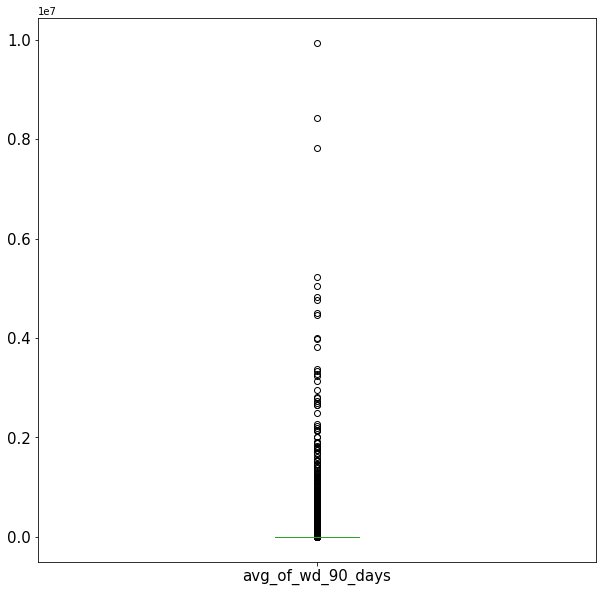

Analyzing outliers of column: age_in_year
0 outliers clipped


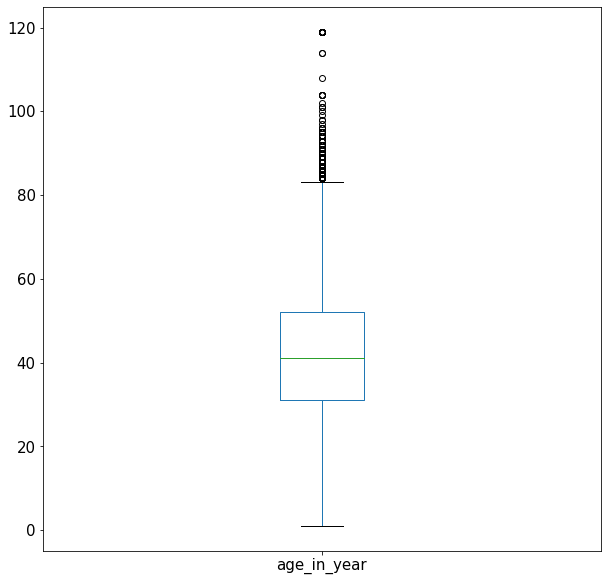

Analyzing outliers of column: number_of_deposit_90_days
30274 outliers clipped


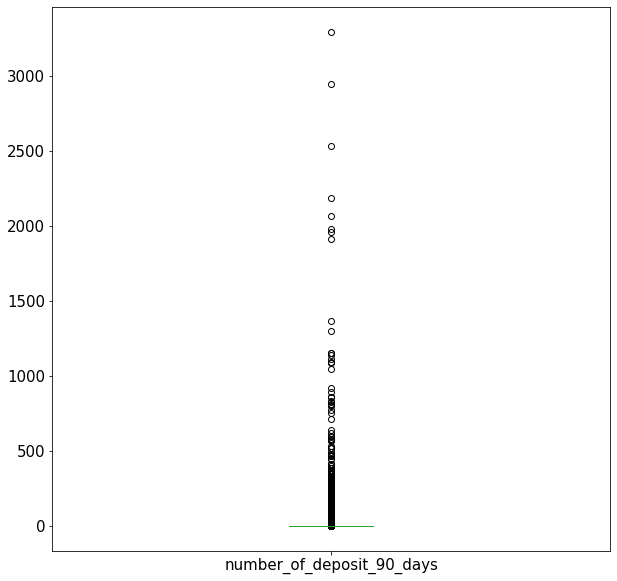

Analyzing outliers of column: avg_last_30_days
61813 outliers clipped


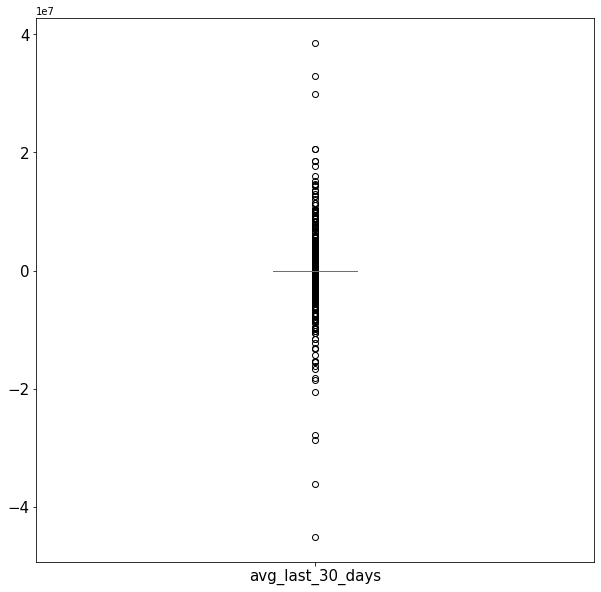

Analyzing outliers of column: number_of_wd_90_days
25290 outliers clipped


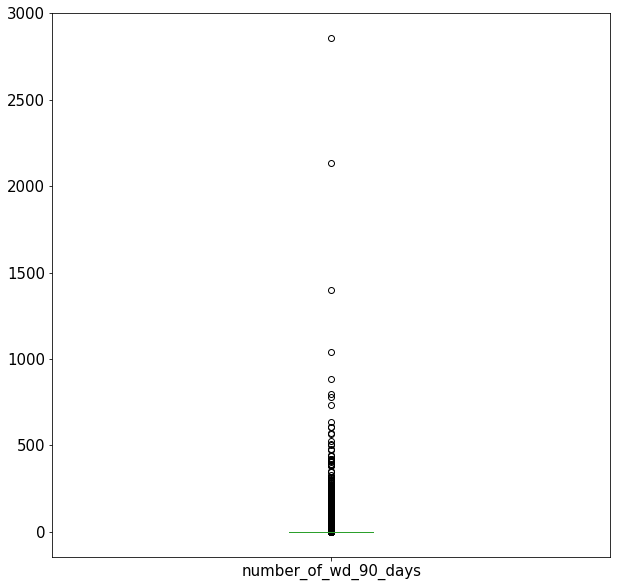

Analyzing outliers of column: number_of_cash_dep_90_days
24027 outliers clipped


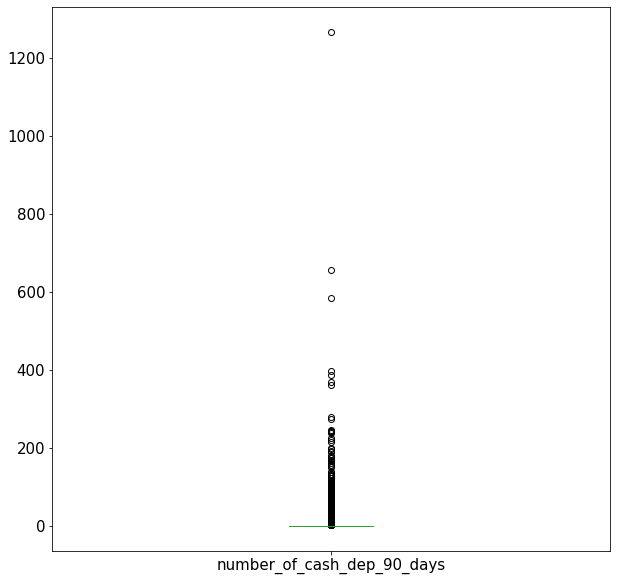

Analyzing outliers of column: avg_last_10_days
62610 outliers clipped


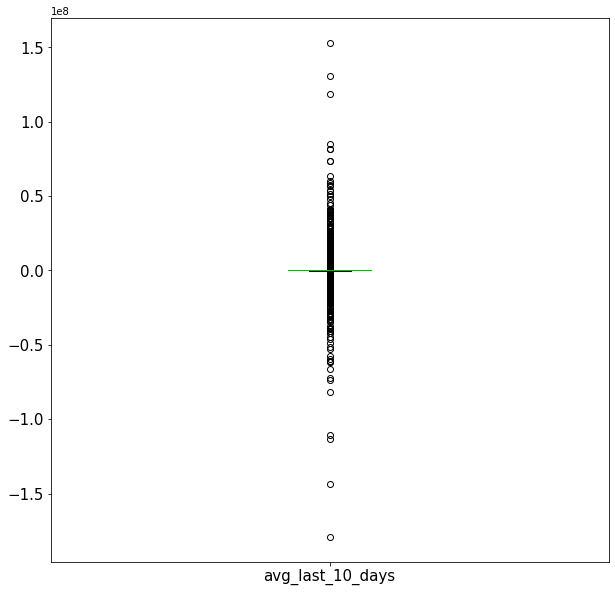

Analyzing outliers of column: number_of_cash_wd_90_days
21337 outliers clipped


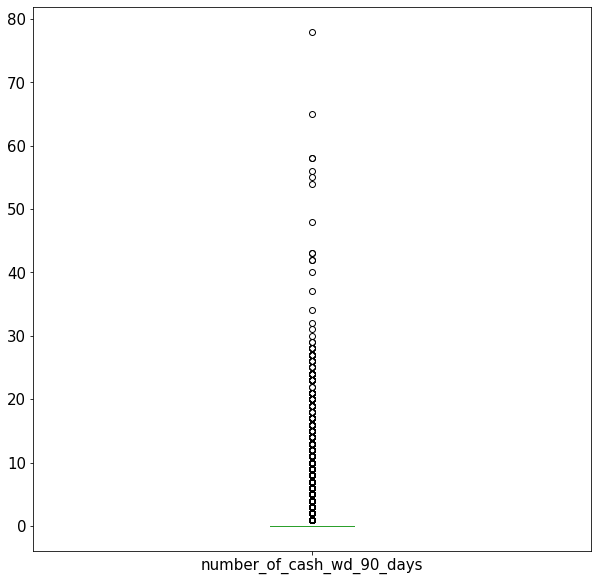

Analyzing outliers of column: avg_of_dep_90_days
30023 outliers clipped


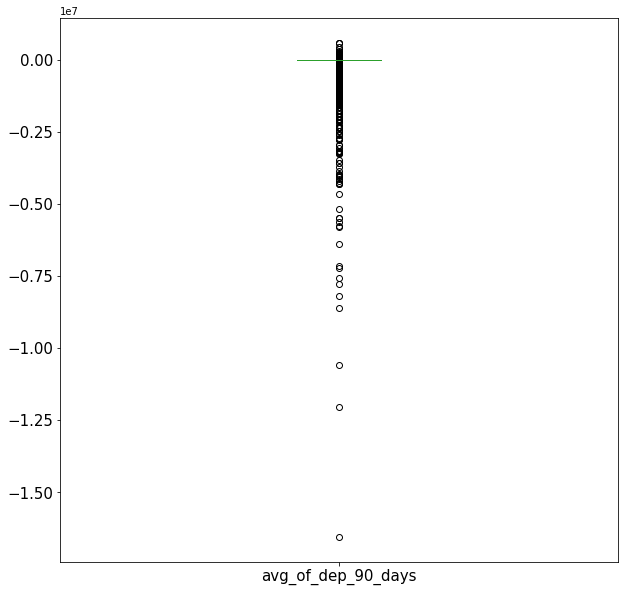

Analyzing outliers of column: avg_of_cash_wd_90_days
21337 outliers clipped


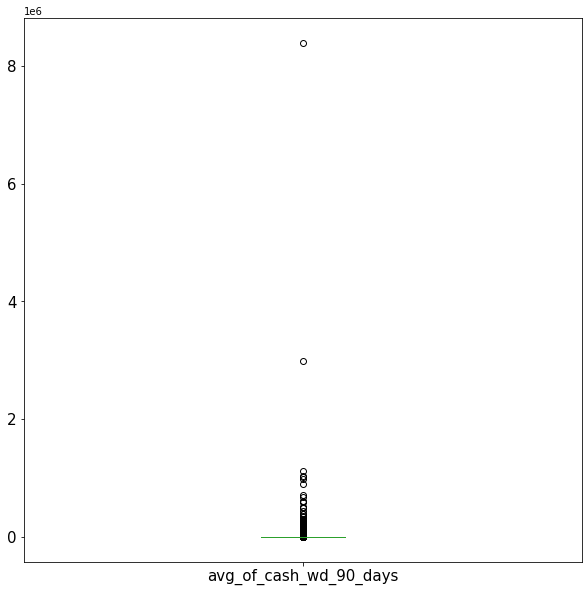

Analyzing outliers of column: avg_cash_deposit_90_days
24027 outliers clipped


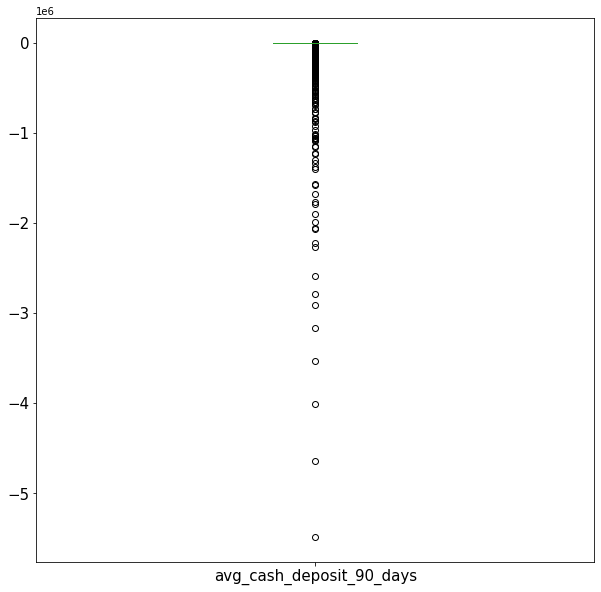

Analyzing outliers of column: avg_last_90_days
66898 outliers clipped


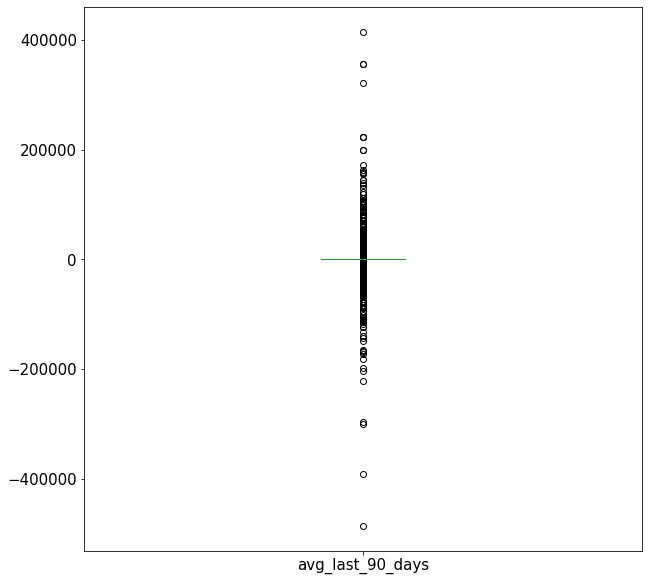

224868

In [35]:
"""
We created a function named clip_outliers which sets fences for all numerical columns to 5 IQR range and clips values
above and below this threshold to their extremes
"""
def clip_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-5*iqr
    fence_high = q3+5*iqr
    print(str(len(df_in[(df_in[col_name] < fence_low)])+len(df_in[(df_in[col_name] > fence_high)]))+" outliers clipped")
    df_in.at[(df_in[col_name] < fence_low),col_name]=fence_low
    df_in.at[(df_in[col_name] > fence_high),col_name]=fence_high
    return df_in

for (columnName, _) in df[list_numeric_cols].iteritems():
    if df[columnName].dtype in ['int64','float64']: 
        print("Analyzing outliers of column: {}".format(columnName))
        plt.figure(figsize=(10,10))
        df.boxplot([columnName], grid=False, fontsize=15)
        df = clip_outliers(df,columnName)
        plt.show()
len(df)

## Adding Features
### Creating Profile Columns from Metadata

We use the risk based profiling details provided in the metadata excel for limited columns to create new columns which contain the risk level attached to those attributes

In [36]:
"""
This block contains a function create_profile_column to which takes column name as parameter and using the 
values defined in the metadata dataframe assigns the corresponding risk category in the new profile column
"""
list_profiling_cols = ['profession','ledgerCode','ECO_SEC','TYPE_OF_DEP','LEGAL_STA_CODE',
                      'residentCountry','extraNationality','nationalityOriginal','accountCurrency']

def create_profile_column(column):
    col_name = column+"_profile"
    low_values = list(metadata[(metadata['col_name'] == column) & (metadata['Code'] == 'Low')].Value)
    df.loc[df[column].isin(low_values), col_name] = 'Low'
    medium_values = list(metadata[(metadata['col_name'] == column) & (metadata['Code'] == 'Medium')].Value)
    df.loc[df[column].isin(medium_values), col_name] = 'Medium'
    high_values = list(metadata[(metadata['col_name'] == column) & (metadata['Code'] == 'High')].Value)
    df.loc[df[column].isin(high_values), col_name] = 'High'
    
#Calling the function on list_profiling_cols in a loop
for column in list_profiling_cols:
    create_profile_column(column)

### Nulls Treatment
Listing all the nulls

In [37]:
100*df.isnull().sum()/df.isnull().count()

customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265934
nationalityOriginal             1.531565
extraNationality               99.396090
dateOfBirth                     2.096786
age_in_year                     2.096786
profession                     64.535639
ledgerCode                      7.474607
accountCurrency                 0.000000
jointAccount                    0.000000
CUS_CLASS                       0.000000
ECO_SEC                         0.000000
TYPE_OF_DEP                     0.000000
GENDER                         53.591885
LEGAL_STA_CODE                  1.163349
avg_last_10_days                0.000000
avg_last_30_days                0.000000
avg_last_90_days                0.000000
number_of_cash_dep_90_days      0.000000
avg_cash_deposit_90_days        0.000000
number_of_deposit_90_days       0.000000
avg_of_dep_90_da

After removing all garbage values and adding the profile columns for features mentioned in the metadata we find nulls in the following columns:
1. residentCountry - We leave the value as null and impute the mode value into the column residentCountry_profile as per the rba_grade_desc grouping
2. nationalityOriginal - We leave the value as null and impute the mode value into the column nationalityOriginal_profile as per the rba_grade_desc grouping
3. dateOfBirth - Since we have another feature age_in_year this feature will be dropped
4. age_in_year - We impute the median value into the column as per the rba_grade_desc grouping
5. profession - We leave the value as null and impute the mode value into the column profession_profile as per the rba_grade_desc grouping
6. ledgerCode - We leave the value as null and impute the mode value into the column ledgerCode_profile as per the rba_grade_desc grouping
7. LEGAL_STA_CODE - We leave the value as null and impute the mode value into the column LEGAL_STA_CODE_profile as per the rba_grade_desc grouping
8. GENDER - We will create a new category called name "GN" which stands for Gender-Neutral and the values for which we do not have any gender we impute the value 1.5 (since Male -1 Female-2) it will neutralize the effect of Gender on that row
9. extraNationality and extraNationality_profile: Retained as is

In [38]:
df.drop(['dateOfBirth'], axis = 1, inplace = True)
dropped_cols.append('dateOfBirth')
df['age_in_year'] = df.groupby("rba_grade_desc")[['age_in_year']].transform(lambda x: x.fillna(x.median()))
df['GENDER'] = df['GENDER'].fillna(1.5)

##### Treating the remaining nulls in the profiling columns by imputing

In [39]:
#Listing the profiling columns
profiling_cols = ['residentCountry_profile','nationalityOriginal_profile','profession_profile','ledgerCode_profile',
                 'LEGAL_STA_CODE_profile']

In [40]:
#Disclaimer: The following code block does not work on a few environments
for col in profiling_cols:
    modes = df.groupby(df.rba_grade_desc)[[col]].agg(lambda x:x.value_counts().index[0])
    indexes = df.groupby(df.rba_grade_desc)[[col]].get_group('Low')[df[col].isnull()].index.tolist()
    df.loc[indexes,col] = modes.loc['Low'][col]
    indexes = df.groupby(df.rba_grade_desc)[[col]].get_group('Medium')[df[col].isnull()].index.tolist()
    df.loc[indexes,col] = modes.loc['Medium'][col]
    indexes = df.groupby(df.rba_grade_desc)[[col]].get_group('High')[df[col].isnull()].index.tolist()
    df.loc[indexes,col] = modes.loc['High'][col]

<ipython-input-40-190b18c62bdc>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = df.groupby(df.rba_grade_desc)[[col]].get_group('Low')[df[col].isnull()].index.tolist()
<ipython-input-40-190b18c62bdc>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = df.groupby(df.rba_grade_desc)[[col]].get_group('Medium')[df[col].isnull()].index.tolist()
<ipython-input-40-190b18c62bdc>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = df.groupby(df.rba_grade_desc)[[col]].get_group('High')[df[col].isnull()].index.tolist()


### Modelling  with Clean Data

We selected Random Forest as both our Regressor and Classifier because it requires little data prepocessing and scales relatively well when the number of features is increased (unlike Linear/Logistic Regression).<br>
Furthermore, it is also less prone to overfitting than most other decision tree family algorithms (e.g. XGBoost) and is suitable for large datasets (SVM would perform better when facing smaller training sets).<br>
Finally, it also does feature selection internally, hence appropriate given the scope of this assignment. The 
latter also justifies why model fine tuning was conducted :).

In [41]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 

#### Regression Analysis

In [42]:
df_regression = df.copy()

- We have created new profiling columns and some previously existing features which have categorical string type values cannot be directly fed to a regression algorithm since they can only be used with numerical columns<br>
- The list of features which are descriptive but avaialable as strings are therefore factorized and the string values get labelled as numeric making them available to be used on a model 

In [43]:
col_to_factorize = ['profession_profile','ledgerCode_profile','ECO_SEC_profile','TYPE_OF_DEP_profile',
                  'LEGAL_STA_CODE_profile','residentCountry_profile','extraNationality_profile',
                  'nationalityOriginal_profile','accountCurrency_profile','score_card','rba_grade_desc','onboarding']
for col in col_to_factorize:
    df_regression[col] = pd.factorize(df_regression[col])[0]

These models cannot use null values, hence we need to find columns with null values

In [44]:
missing_values_per = 100*df_regression.isnull().sum()/df.isnull().count()
cols_to_drop = list(missing_values_per[missing_values_per>0].index)
cols_to_drop

['residentCountry',
 'nationalityOriginal',
 'extraNationality',
 'profession',
 'ledgerCode',
 'LEGAL_STA_CODE']

Since we know the model needs only numerical columns we also identify the non-numeric columns

In [45]:
print(list(df_regression.select_dtypes(exclude=['int64','float64']).columns))
cols_to_drop.extend(list(df_regression.select_dtypes(exclude=['int64','float64']).columns))

['creationDate', 'residentCountry', 'nationalityOriginal', 'extraNationality', 'accountCurrency', 'rbaGradeAbrv']


###### Dropping Non-Numeric Columns and Columns with nulls from the regression DataFrame

In [46]:
df_regression.drop(cols_to_drop,axis = 1, inplace = True)

In [47]:
from sklearn.model_selection import train_test_split
def split_df(dataframe, seed=None, percentage=0.8):
    """ Function that splits a dataframe into train/test sets. Seed is taken as an input 
    to allow for output reproducability. Target Value : 'rbaValue';"""   
    X = dataframe.loc[:, dataframe.columns != 'rbaValue']
    y = dataframe['rbaValue']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed)

#Splitting dataset into 80% train , 20% test set
X_train, X_test, y_train, y_test = split_df(df_regression, seed=42, percentage=0.8)

In [48]:
#Creating Regression Object
forest_reg = RandomForestRegressor()

# Train the model using the training sets
forest_reg.fit(X_train, y_train)

#Predicting on Test Set
forest_pred = forest_reg.predict(X_test)

*Model Performance Evaluation*

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficient of determination: R-squared
print('Train R-Squared: %.2f' % forest_reg.score(X_train, y_train))
print('Test R-Squared: %.2f' % r2_score(y_test, forest_pred))

# RMSE:
print('Test RMSE: %.2f' % mean_squared_error(y_test, forest_pred, squared=False))

Train R-Squared: 0.93
Test R-Squared: 0.86
Test RMSE: 3.14


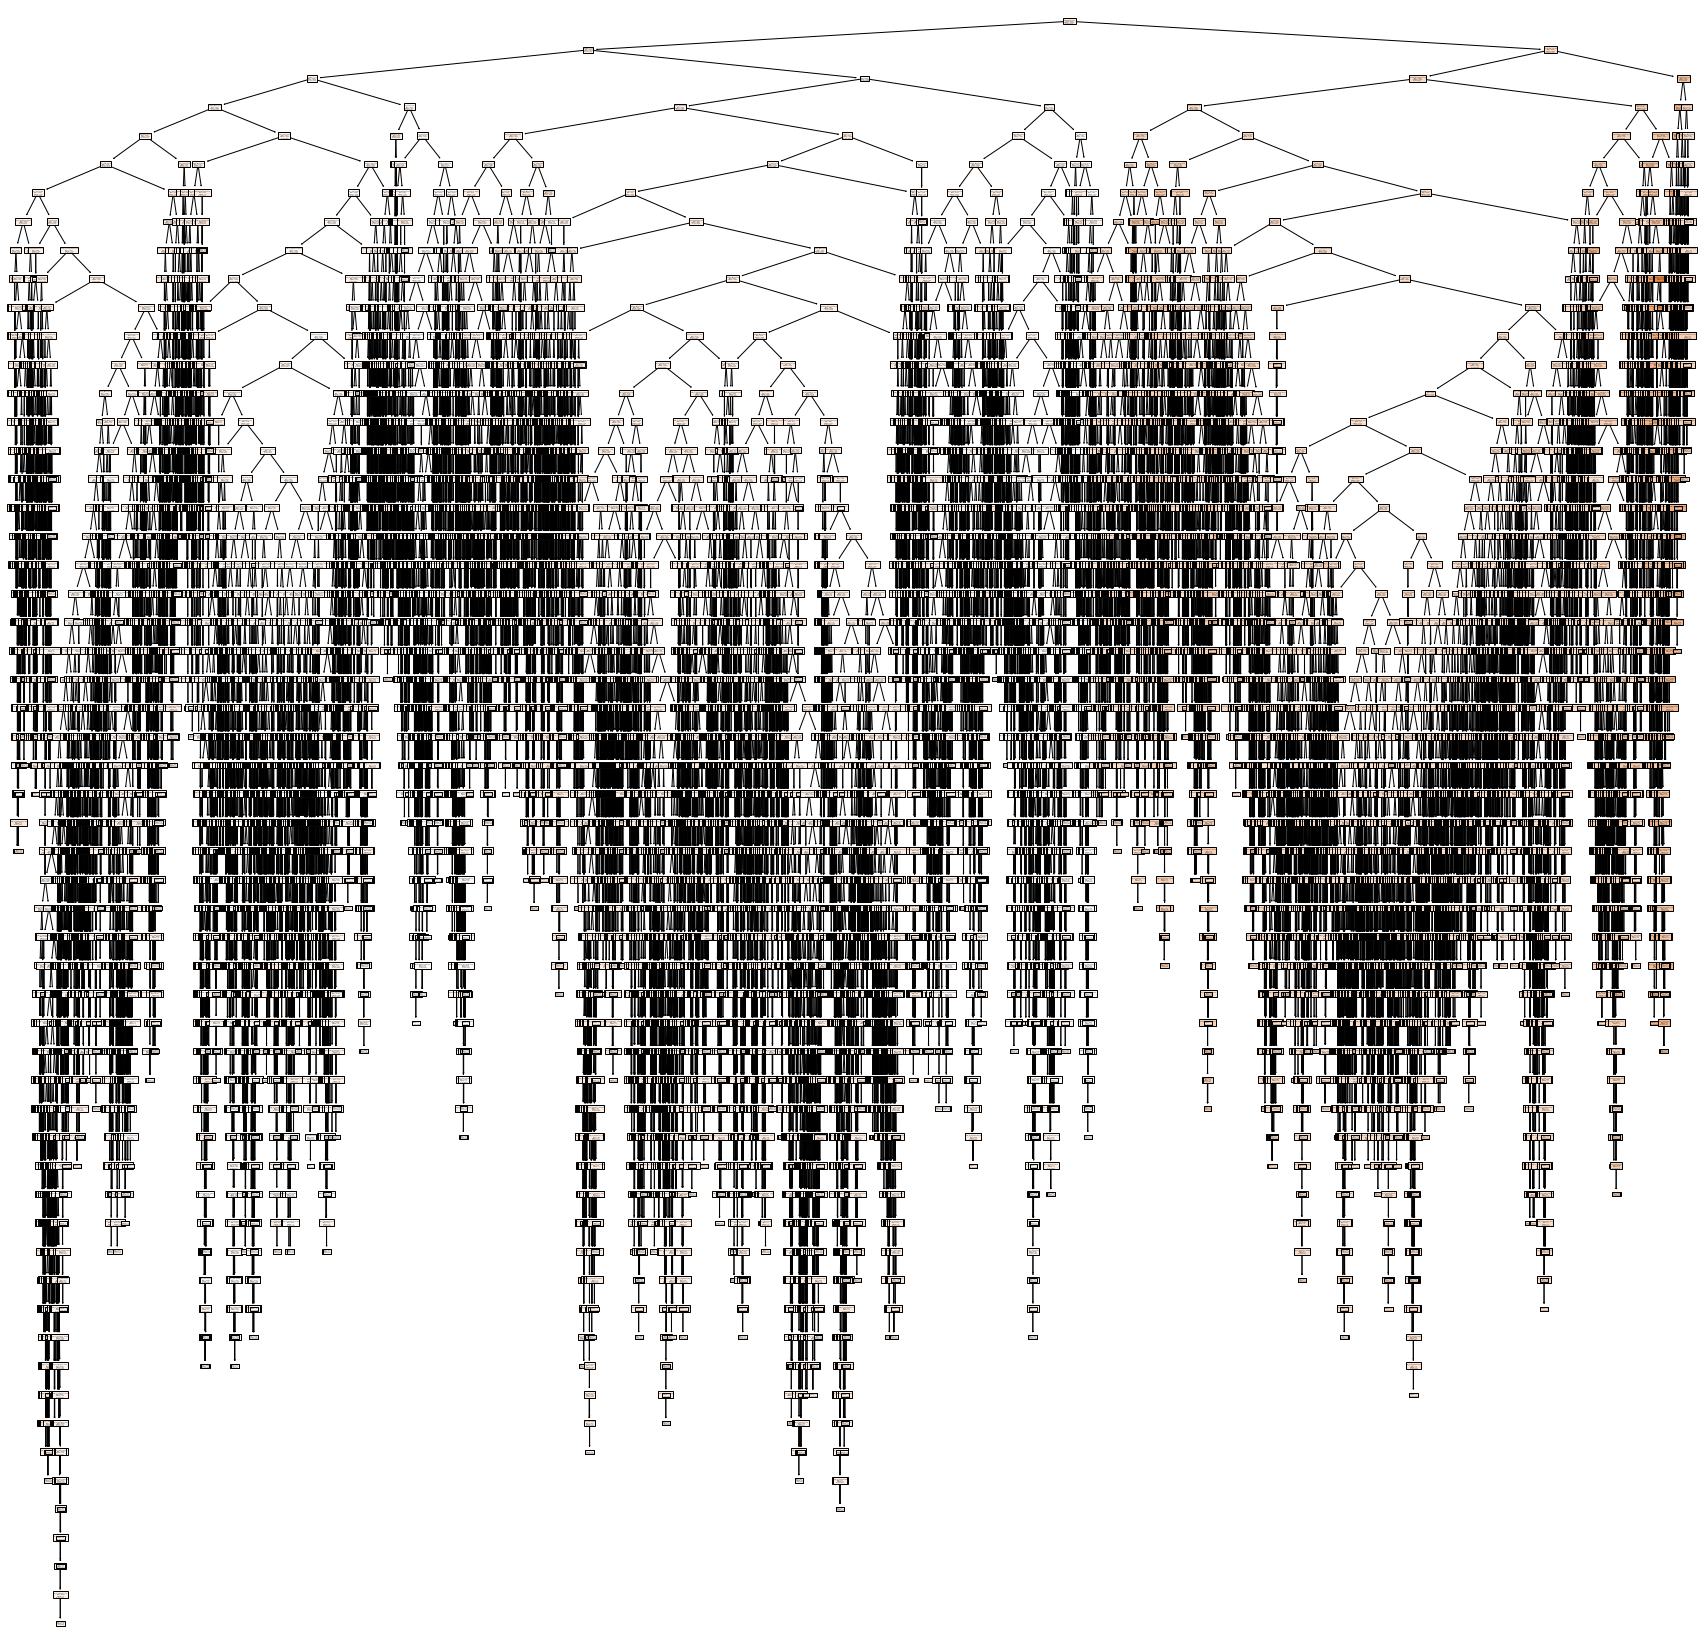

In [50]:
#Visualizing one tree of the Random Forest Model
from sklearn import tree
plt.figure(figsize=(30,30))
_ = tree.plot_tree(forest_reg.estimators_[0], feature_names=X_train.columns, filled=True)

*Cross Validation*

In [51]:
def display_scores(score):
    """Function to display Cross-Validation Scores"""
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation:", scores.std())

In [ ]:
"""
This code is to run cross-validation to fine tune the model.
Because of the huge size of the dataset we do not run this block
"""
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error') 
forest_rmse_scores = (-scores)
display_scores(forest_rmse_scores)

### Classification Analysis

In [52]:
df_classification = df_regression.copy()

In [53]:
df_classification.loc[df_classification['rba_grade_desc'] == 2, 'rba_grade_desc'] = 1

We cannot use the rbaValue column for the classification since it is the column that decides the rba_grade_desc value and will heavily overfit our model since that value also is determined using other features

In [54]:
df_classification = df_classification.loc[:, df_classification.columns != 'rbaValue']

In [55]:
def split_df(dataframe, seed=None, percentage=0.8):
    """ Function that splits a dataframe into train/test sets. Seed is taken as an input 
    to allow for output reproducability. Target Value : 'rba_grade_desc';
    """   
    X = dataframe.loc[:, dataframe.columns != 'rba_grade_desc']
    y = dataframe['rba_grade_desc']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed)

#Splitting dataset into 80% train , 20% test set
X_train, X_test, y_train, y_test = split_df(df_classification, seed=42, percentage=0.8) 


forest_clf = RandomForestClassifier(random_state = 42)

#Training our classifier
forest_clf.fit(X_train , y_train)

# Predict labels on test
predictions = forest_clf.predict(X_test)

*Model Performance Evaluation*

Random Forest Classifier Accuracy = 0.9536398808200294
Random Forest Classifier Precison = 0.9294947121034077
Random Forest Classifier Recall = 0.9091954022988505


/Users/abhishekkohli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


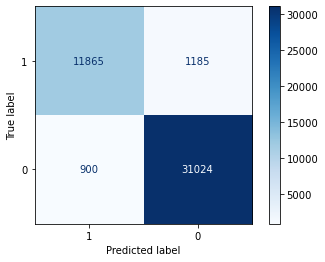

In [56]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve , plot_confusion_matrix
"""
The selected metrics are the industry-standard for classification analysis. Note that we can only rely on 
such metric when we don't have an extremely unblanced dataset (71.02% , 28.98% in our case).
"""
# Print Performance Metrics
print("Random Forest Classifier Accuracy = {}".format(accuracy_score(y_test,predictions)))
print("Random Forest Classifier Precison = {}".format(precision_score(y_test,predictions)))
print("Random Forest Classifier Recall = {}".format(recall_score(y_test,predictions)))

#Plot Confusion Matrix
#plot_confusion_matrix(forest_clf, X_test, y_test, [0,1], cmap=plt.cm.Blues);
plot_confusion_matrix(forest_clf, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [57]:
"""
Computing the Matthews Correlation Coefficient to double check the performance of our classifier, since 
the data is a bit unbalanced
"""
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.886834304173341

In [58]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr_forest,tpr_forest,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')

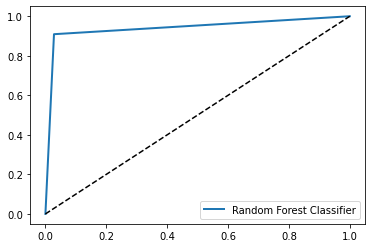

AUC = 0.9405017232017997


In [59]:
#Plotting ROC Curve
y_scores_forest = predictions[:]

fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_test,y_scores_forest)
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest Classifier")
plt.legend(loc = "lower right")
plt.show()

print("AUC = {}".format(roc_auc_score(y_test,y_scores_forest)))

*Cross Validation*

In [ ]:
"""
This code is to run cross-validation to fine tune the model.
Because of the huge size of the dataset we do not run this block
"""
#Performing Cross-Validation to assess reliability of our classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error') 
forest_rmse_scores = (-scores)
display_scores(forest_rmse_scores)